### The nature of numerical methods

### Example 1: Heron's method

Objective: calculate an approximation of the square root of a number $a$

Method:

1. start with an initial estimate of the square root $x$
2. Correct the estimate using the formula $x_{corrected} = \frac{1}{2} (x + \frac{a}{x})$
3. Repeat step 2 twenty times

The final $x$ is the square root of $a$

### Heron's methods implementation

Let's start with a very simple implementation...

In [1]:
#| echo: true

# Compute the square root of 2
a = 2.0

# The initial estimate
x = 1.0

# Correct 20 times, according to the formula
# x_correct = (1/2) (x + a/x)

for i in range(20):
    x = 0.5 * (x + a/x)

print(x)

1.414213562373095


### 

A few questions come to mind:

- is the answer correct?
- why does it work? where does the "correction" formula come from?
- what is happening to $x$ during the corrections?
- the initial estimate $x$ matters? what if we chose a different value?
- why 20 times?
- does this "recipe" always work?

### 

Improve the program:

- check if the result is correct
- report what happens during the "corrections"

### {.scrollable}

In [2]:
#| echo: true
#| output-location: slide

from math import sqrt # to use with sqrt() function

# Compute the square root of 2
a = 2.0
real_result = sqrt(a)

# The initial estimate
x = 1.0
print("Initial estimate", x)

# Correct 20 times
for i in range(20):
    x = 0.5 * (x + a/x)
    print(f"Correction {i+1}: {x}")

print(f"\nFinal result:\nThe square root of {a} is {x}")
print(f"The error in the result is {x-real_result}")

Initial estimate 1.0
Correction 1: 1.5
Correction 2: 1.4166666666666665
Correction 3: 1.4142156862745097
Correction 4: 1.4142135623746899
Correction 5: 1.414213562373095
Correction 6: 1.414213562373095
Correction 7: 1.414213562373095
Correction 8: 1.414213562373095
Correction 9: 1.414213562373095
Correction 10: 1.414213562373095
Correction 11: 1.414213562373095
Correction 12: 1.414213562373095
Correction 13: 1.414213562373095
Correction 14: 1.414213562373095
Correction 15: 1.414213562373095
Correction 16: 1.414213562373095
Correction 17: 1.414213562373095
Correction 18: 1.414213562373095
Correction 19: 1.414213562373095
Correction 20: 1.414213562373095

Final result:
The square root of 2.0 is 1.414213562373095
The error in the result is -2.220446049250313e-16


### Numerical methods

The Heron's method is a **numerical method**

It provides a solution to a problem by *performing operations on numbers and providing a numerical solution to the problem*

(this is increadibly vague)



### Numerical methods: basic concepts

In particular, the Heron's method works by applying a sucession of improvements called **iterations**, based on an **iteration formula**. (From now on, "corrections" will be called *iterations*).

The iterations are supposed to **converge** to the solution (the method "converges"). After a number of sufficient iterations, the final result is an approximation to the solution of a problem.



### Different handling of convergence

Let's modify the program to show if we can get close to the result in a number of iterations different from 20...


In [3]:
#| echo: true
#| output-location: slide
from math import sqrt # to check the answer with sqrt() function

# Compute the square root of 2
a = 2.0
real_result = sqrt(a)
# The initial estimate
x = 1.0
print("Initial estimate", x)

tolerance = 1e-10 # max difference between x and corrected x

# Iterations
for i in range(1000): # no more than 1000 iterations
    new_x = 0.5 * (x + a/x)
    print(f"Iteration {i+1}: {new_x}")
    difference = abs(new_x - x)
    x = new_x
    if abs(difference) < tolerance:
        break # premature exit of the for loop, before 1000 iterations

print(f"\nFinal result:\nThe square root of {a} is {x}")
print(f"The error in the result is {x-real_result:.3e}")

Initial estimate 1.0
Iteration 1: 1.5
Iteration 2: 1.4166666666666665
Iteration 3: 1.4142156862745097
Iteration 4: 1.4142135623746899
Iteration 5: 1.414213562373095

Final result:
The square root of 2.0 is 1.414213562373095
The error in the result is -2.220e-16


### The role of tolerance

Now we had only 5 iterations instead of 20.

The use `tolerance` is a different way to stop a numerical method that works by sucessive iterations towards a solution.

If the "correction amount" is very small, the new $x$ is very close to the previous $x$ and we can consider that the approximation is sufficiently good and stop the process before reaching a large number of iterations (1000).

`tolerance` is a small number that we set in the program and represents the maximum deviation between the new $x$ and the previous $x$ that we can consider sufficiently small to stop the iterations.


### Keeping the "history" to display or plot in the end

In a new improvement of the program, we keep the history of what is going on and display in the end only. This "history" will be implemented as a Python dictionary


### 

In [4]:
#| echo: true
#| output-location: slide
from math import sqrt # to check the answer with sqrt() function

# Compute the square root of 2
a = 2.0
real_result = sqrt(a)

# to keep the history...
history = {"x_values": [], "dif_values": [], "initial": 0.0, "final": 0.0}

# The initial estimate
x = 1.0
history["x_values"].append(x)
history["initial"] = x

tolerance = 1e-10 # max difference between x and corrected x

# Iterations
for i in range(1000): # no more than 1000 iterations
    new_x = 0.5 * (x + a/x)
    difference = abs(new_x - x)
    history["dif_values"].append(difference)
    x = new_x
    history["x_values"].append(x)
    if abs(difference) < tolerance:
        break # premature exit of the for loop, before 1000 iterations
history["final"] = x

# how many iterations
n_iter = len(history["dif_values"])

print(f"Computing square root of {a} by Heron's method")
print("Initial estimate:", history["initial"])


for i in range(n_iter):
    iter = i+1
    print(f"Iteration {iter}: x = {history['x_values'][iter]}, dif = {history['dif_values'][i]}")

print(f"\nFinal result:\nThe square root of {a} is {history["final"]}")
print(f"The error in the result is {history["final"] - real_result:.3e}")

Computing square root of 2.0 by Heron's method
Initial estimate: 1.0
Iteration 1: x = 1.5, dif = 0.5
Iteration 2: x = 1.4166666666666665, dif = 0.08333333333333348
Iteration 3: x = 1.4142156862745097, dif = 0.002450980392156854
Iteration 4: x = 1.4142135623746899, dif = 2.1238998197947723e-06
Iteration 5: x = 1.414213562373095, dif = 1.5949463971764999e-12

Final result:
The square root of 2.0 is 1.414213562373095
The error in the result is -2.220e-16


### Plot the history using *matplotlib*

The history of $x$'s and $dif$'s can be plotted... 


### Preparation of a figure with two panels

In [5]:
# don't ask...
%config InlineBackend.figure_formats = ['svg']

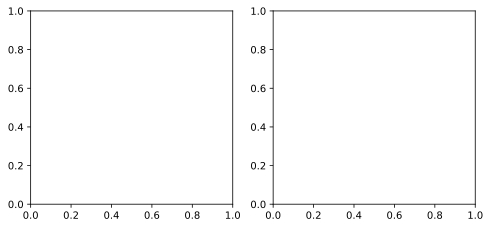

In [6]:
#| echo: true
#| output-location: slide
from matplotlib import pyplot as plt # a necessary import to use matplotlib

# preparation: a figure with two plots side-by-side

f, (pleft, pright) = plt.subplots(1, 2, figsize=(8, 3.5))

plt.show()

### Plotting the data

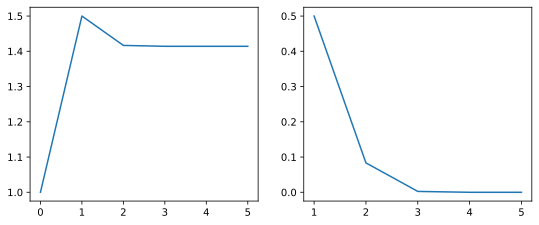

In [7]:
#| echo: true
f, (pleft, pright) = plt.subplots(1, 2, figsize=(9, 3.5))

# plot x_values on the left, diferences on the right

pleft.plot(range(n_iter+1), history["x_values"])
pright.plot(range(1, n_iter+1), history["dif_values"])

plt.show()

### Improving the plots

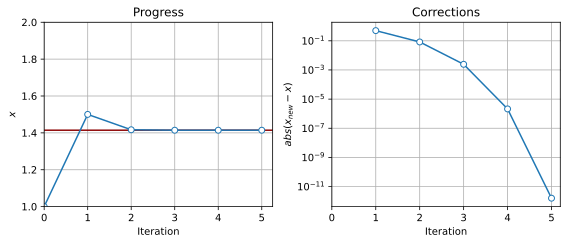

In [8]:
#| echo: true
#| output-location: slide
# it is a bit ugly, let's improve it,
# using the power of matplotlib "axes" options

# preparation
f, (pleft, pright) = plt.subplots(1, 2, figsize=(8, 3.5), tight_layout=True)

# plot x_values on the left, differences on the right
pleft.axhline(real_result, color='darkred')
pleft.plot(range(n_iter+1), history["x_values"],
           marker="o", markerfacecolor="white")
pleft.set(xlabel="Iteration", ylabel="$x$",
          xlim=(0, None), ylim=(1, 2), title="Progress")
pleft.grid(True)

pright.plot(range(1, n_iter+1), history["dif_values"],
            marker="o", markerfacecolor="white")
pright.set(xlabel="Iteration", ylabel="$abs(x_{new} - x)$",
           xlim=(0, None), title="Corrections")
pright.set_yscale("log")
pright.grid(True)

plt.show()

### Exercise

Study the effect of changing the initial estimate.

Repeat the whole algorithm for a set of initial estimates, say seven, including negative values.

Keep all the "histories", and superimpose **on the same plots** the results of the several estimations. Don't forget to add a legend for the different initial values

### Solution

In [9]:
#| echo: true
from math import sqrt # to check the answer
# Compute the square root of 2
a = 2.0
real_result = sqrt(a)

# valores iniciais a testar
initial_x = [1, 3, 10, 20, -1, -3, 10, -20]
history_list = []

for initial in initial_x:

    # to keep the history...
    history = {"x_values": [], "dif_values": [], "initial": 0.0, "final": 0.0}

    # The initial estimate
    x = initial
    history["x_values"].append(x)
    history["initial"] = x

    tolerance = 1e-10 # max difference between x and corrected x

    # Iterations
    for i in range(1000): # no more than 1000 iterations
        new_x = 0.5 * (x + a/x)
        difference = abs(new_x - x)
        history["dif_values"].append(difference)
        x = new_x
        history["x_values"].append(x)
        if abs(difference) < tolerance:
            break # premature exit of the for loop, before 1000 iterations
    
    history["final"] = x
    history_list.append(history)

### Solution (plots)

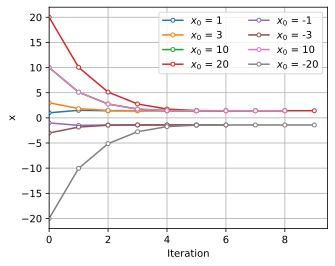

In [10]:
#| echo: true
#| output-location: slide
# plot for all initial values
f , p = plt.subplots(1,1, figsize=(5,4))

for history in history_list:
    y = history["x_values"]
    x = range(len(history["x_values"]))
    p.plot(x, y, marker="o", markersize=4,
           markerfacecolor="white",
           label=f"$x_0$ = {history["initial"]}")
p.set(xlabel="Iteration", ylabel="x", xlim=(0, None))
p.grid(True)
p.legend(ncols=2)
plt.show()

### Newton's method

- Heron's method is a particular case of the Newton's method.

- Newton's method is a numerical method to find the zero of a function $f(x)$, from an initial estimate of the zero $x_0$ and the knowledge of the function $f(x)$ and its first derivative $f'(x)$

- Heron's method is the Newton's method applied to function $f(x) = x^2 - a$

### Newton's method (graphical interpretation)

As an example, how iteration $x_1$ is corrected to iteration $x_2$:

![](newton.png)

### Example 2: pH of solution of weak acid by fixed-point iteration

Acetic acid: pKa = 4.76

What is the pH of a solution of acetic acid after dissolving (and mixing) a total acid T = 0.01 M ?

- HAc ⇄ Ac<sup>-</sup> + H<sup>+</sup>

- $T = [Ac^-]_{eq} + [H^+]_{eq}$

- and we will ignore the contribution of water to H<sup>+</sup>

### 

Using fixed point iteration $x_{new} = \sqrt{(K_a (T-x))}$

In [25]:
#| echo: true
#| output-location: slide
from math import log10

pKa = 4.76
T = 0.01 # M (dissolved)

# Compute Ka
Ka = 10**(-pKa)
print("Ka = ", Ka)
print("T  = ", T)

# x, the [H+] = [Ac-], verifies Ka = x**2 / (T - x)
# or
# x = sqrt(Ka * (T - x))

# to keep the history...
history = {"x_values": [], "pH_values": [], "deltapH": []}


# The initial estimate
x = 0.001
history["x_values"].append(x)
history["pH_values"].append(-log10(x))

tolerance = 0.01 # max difference between pH and corrected pH

# Iterations
for i in range(100): # no more than 100 iterations
    old_pH = -log10(x)

    new_x = (Ka * (T-x))**0.5 # the correction

    pH = -log10(new_x)
    history["pH_values"].append(pH)

    dif_pH = abs(pH - old_pH)
    x = new_x
    history["x_values"].append(x)
    if abs(dif_pH) < tolerance:
        break # premature exit of the for loop

# how many iterations
n_iter = len(history["x_values"]) -1

print("\nInitial pH estimate:", history["pH_values"][0])

for i in range(n_iter):
    iter = i+1
    print(f"Iteration {iter}: pH = {history['pH_values'][iter]}")

print(f"\nFinal result:\n[H+] = {history["x_values"][-1]:.5e} M")
print(f"pH = {history["pH_values"][-1]:.2f}")


Ka =  1.7378008287493764e-05
T  =  0.01

Initial pH estimate: 3.0
Iteration 1: pH = 3.4028787452803373
Iteration 2: pH = 3.3887621000434556
Iteration 3: pH = 3.389057710626766

Final result:
[H+] = 4.08265e-04 M
pH = 3.39


### 

Notice how tolerance now applies to pH values and not to $x$, the concentration of H<sup>+</sup> = concentration of Ac<sup>-</sup>

### Exercise

Plot the pH as a function of dissolved HAc,

in the range 0.0001 M to 0.1 M

### Solution

(of exercise, not of acetic acid)

In [55]:
#| echo: true
#| output-location: slide
from math import log10
import numpy as np

pKa = 4.76
Ka = 10**(-pKa)
tolerance = 0.001 # max difference between pH and corrected pH

# now T varies
T_values = np.logspace(-4, -1, 20) # 20 points, from 1e-4 to 0.1
pH_values = [] # to hold the computed values

for T in T_values:
    # no need to keep the history, only the pH
    # The initial estimate
    x = T/100

    # Iterations
    for i in range(100): # no more than 100 iterations
        old_pH = -log10(x)
        new_x = (Ka * (T-x))**0.5 # the correction
        pH = -log10(new_x)

        dif_pH = abs(pH - old_pH)
        x = new_x
        if abs(dif_pH) < tolerance:
            break # premature exit of the for i loop
    pH_values.append(pH)

print("   T     pH")
for T, pH in zip(T_values, pH_values):
    print(f"{T:10.8f} {pH:.2f}")

print("\nIs equilibrium equation verified?")
for T, pH in zip(T_values, pH_values):
    x = 10**(-pH)
    eq_ratio = (x*x / (T-x)) / Ka
    print(f"(x*x / (T-x))  / Ka = {eq_ratio:.3f}")

   T     pH
0.00010000 4.47
0.00014384 4.38
0.00020691 4.28
0.00029764 4.20
0.00042813 4.11
0.00061585 4.02
0.00088587 3.94
0.00127427 3.85
0.00183298 3.77
0.00263665 3.69
0.00379269 3.61
0.00545559 3.52
0.00784760 3.44
0.01128838 3.36
0.01623777 3.28
0.02335721 3.20
0.03359818 3.12
0.04832930 3.04
0.06951928 2.96
0.10000000 2.88

Is equilibrium equation verified?
(x*x / (T-x))  / Ka = 0.999
(x*x / (T-x))  / Ka = 1.001
(x*x / (T-x))  / Ka = 1.000
(x*x / (T-x))  / Ka = 1.000
(x*x / (T-x))  / Ka = 1.000
(x*x / (T-x))  / Ka = 1.000
(x*x / (T-x))  / Ka = 1.000
(x*x / (T-x))  / Ka = 1.000
(x*x / (T-x))  / Ka = 1.000
(x*x / (T-x))  / Ka = 1.000
(x*x / (T-x))  / Ka = 1.000
(x*x / (T-x))  / Ka = 1.000
(x*x / (T-x))  / Ka = 1.000
(x*x / (T-x))  / Ka = 1.000
(x*x / (T-x))  / Ka = 1.000
(x*x / (T-x))  / Ka = 1.000
(x*x / (T-x))  / Ka = 1.000
(x*x / (T-x))  / Ka = 1.000
(x*x / (T-x))  / Ka = 1.000
(x*x / (T-x))  / Ka = 1.000


### Plots

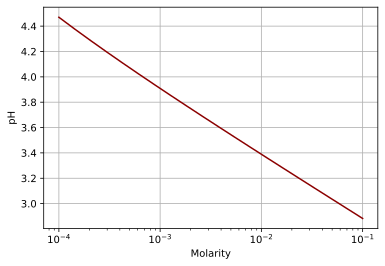

In [54]:
f, ax = plt.subplots(1,1, figsize=(6,4))
ax.plot(T_values, pH_values, color="darkred")
ax.set(xlabel="Molarity", ylabel="pH")
ax.set_xscale("log")
ax.grid()
plt.show()